# PyTorch Workflow

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Data Preparing and Loading

In [ ]:
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

In [ ]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

### Split into training and testing data

In [ ]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

In [10]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});

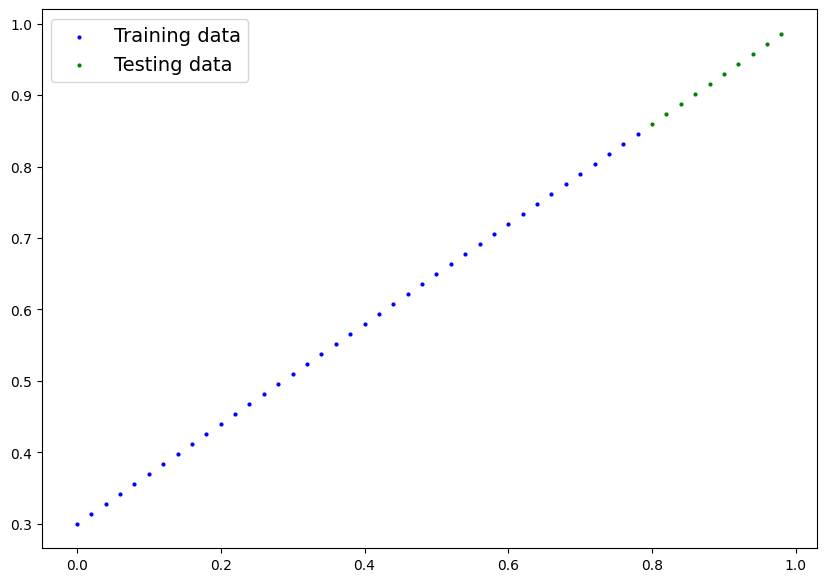

In [ ]:
plot_predictions()

## Build a Model

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))

    # Forward defines the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [ ]:
# Checking the contents of Model
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

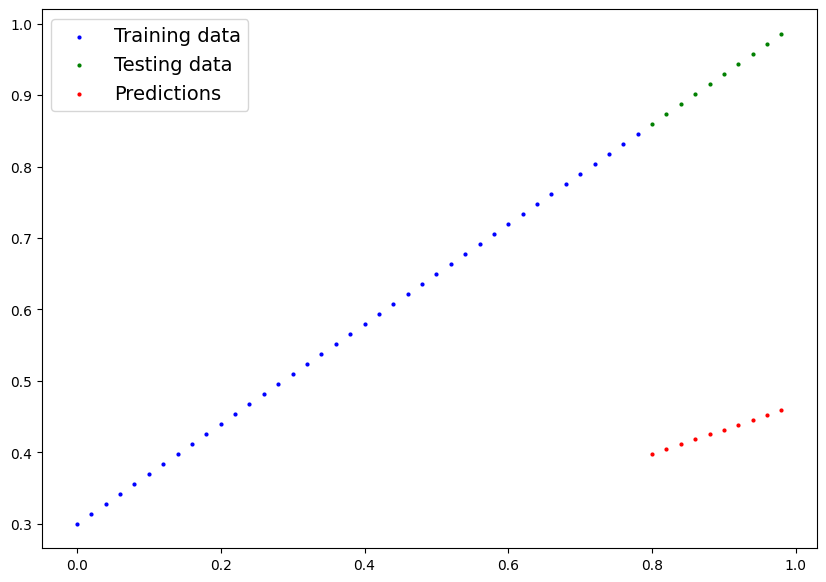

In [ ]:
plot_predictions(predictions=y_preds)

## Train a Model

In [ ]:
# Create a loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1 loss

# Create a optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Putting the model in training mode(default mode)
    model_0.train()

    # 1. Foward pass on train data using the forward() method inside
    y_pred = model_0(X_train)

    # 2. Claculate loss
    loss = loss_fn(y_pred, y_train)
    # print("Loss:", loss)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Calculate loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()


    ### Testing

    # Putting the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward pass on the test data
        test_pred = model_0(X_test)

        # 2. Calculate loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        # Print what's hapenning after every 10 epochs
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")


Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE Test Loss:

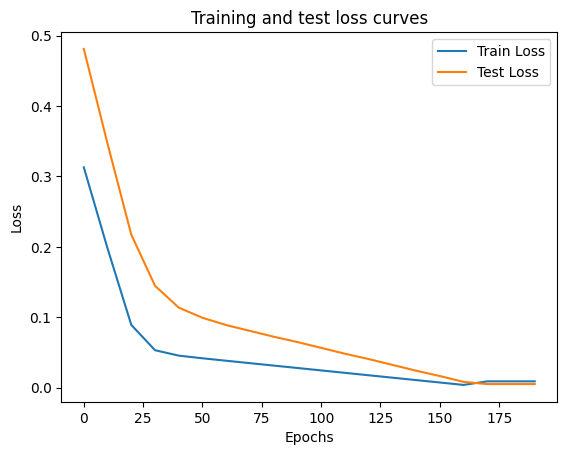

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


## Making predictions with a trained PyTorch model(inference)

In [ ]:
# 1. Set the model in eval mode.
model_0.eval()

# 2. Setup the inference mode context manager.
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

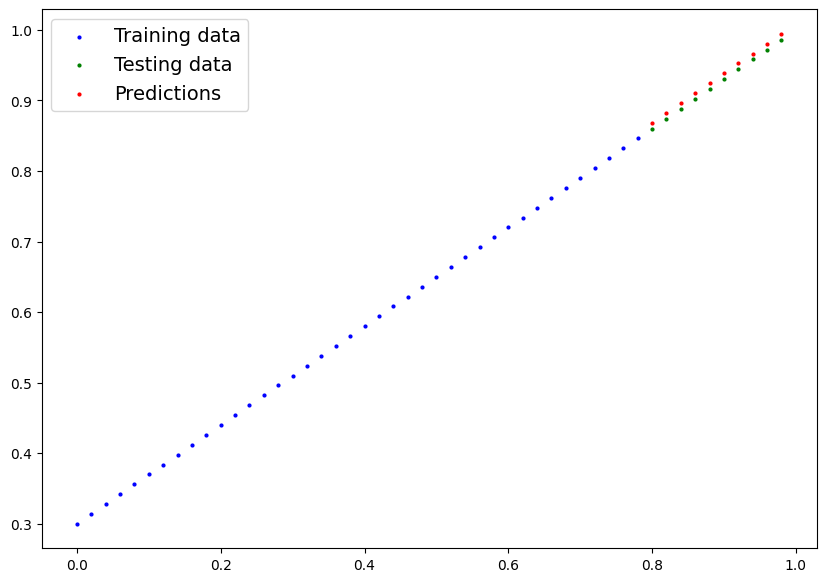

In [ ]:
plot_predictions(predictions=y_preds)

## Saving and Reloading a PyTorch model

### Saving the Model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model sate dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Nov 28 17:39 models/01_pytorch_workflow_model_0.pth


### Loading the Model

In [ ]:
# Loading the Model

# Instantiate a new instance of our model
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of out saved model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# Inferencing on the loaded model

loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Exerxises

In [2]:
!nvidia-smi

Wed Nov 29 04:26:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [14]:
# Setting up the device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Data Preparation

In [6]:
# Create known parameters
weight = 0.3
bias = 0.9

start = 0
end = 2
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

In [8]:
# Splitting the data
train_split = int(len(X)*0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

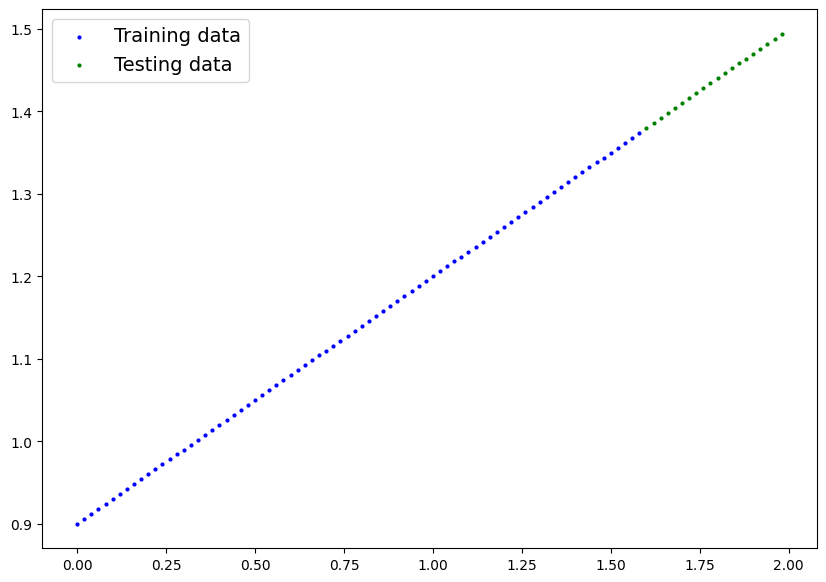

In [13]:
# Visulaizing the data
plot_predictions(X_train, y_train, X_test, y_test)

### Build a Model

In [27]:
# Creating the model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear for model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Instantiating the model
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [28]:
# Check the current device of the model
next(model_1.parameters()).device

device(type='cpu')

In [29]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Train a Model

In [30]:
# Create a loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [31]:
torch.manual_seed(42)

# Setting the epochs
epochs = 300

# Putting the data on the device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    ### Training

    # Set the model to the training mode
    model_1.train()

    # Do the forward pass
    y_pred = model_1(X_train)

    # Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss Backward
    loss.backward()

    # Step the optimizer
    optimizer.step()


    ### Tessting
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 20 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.cpu().detach().numpy())
        test_loss_values.append(test_loss.cpu().detach().numpy())

    print(f"Epoch: {epoch} | MAE Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | MAE Loss: 0.30448824167251587 | Test Loss: 0.7396414875984192
Epoch: 1 | MAE Loss: 0.2921891510486603 | Test Loss: 0.7180727124214172
Epoch: 2 | MAE Loss: 0.2803458869457245 | Test Loss: 0.6968345046043396
Epoch: 3 | MAE Loss: 0.26895448565483093 | Test Loss: 0.6759357452392578
Epoch: 4 | MAE Loss: 0.25801077485084534 | Test Loss: 0.655385434627533
Epoch: 5 | MAE Loss: 0.2475104182958603 | Test Loss: 0.6351925134658813
Epoch: 6 | MAE Loss: 0.2374488115310669 | Test Loss: 0.6153659224510193
Epoch: 7 | MAE Loss: 0.22782091796398163 | Test Loss: 0.5959147214889526
Epoch: 8 | MAE Loss: 0.21862147748470306 | Test Loss: 0.5768476724624634
Epoch: 9 | MAE Loss: 0.20984481275081635 | Test Loss: 0.5581739544868469
Epoch: 10 | MAE Loss: 0.20148491859436035 | Test Loss: 0.5399023294448853
Epoch: 11 | MAE Loss: 0.19353531301021576 | Test Loss: 0.5220417976379395
Epoch: 12 | MAE Loss: 0.18598918616771698 | Test Loss: 0.5046012997627258
Epoch: 13 | MAE Loss: 0.17883913218975067 | Test Loss

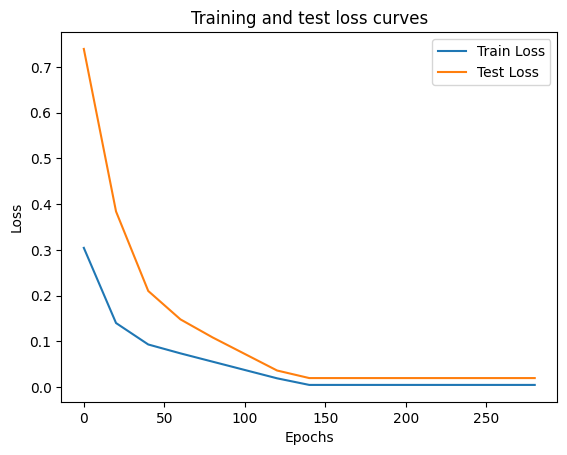

In [32]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

### Inferencing the Model

In [33]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[1.3755],
        [1.3815],
        [1.3875],
        [1.3935],
        [1.3995],
        [1.4055],
        [1.4115],
        [1.4175],
        [1.4235],
        [1.4295],
        [1.4355],
        [1.4415],
        [1.4475],
        [1.4535],
        [1.4595],
        [1.4655],
        [1.4715],
        [1.4775],
        [1.4835],
        [1.4895]], device='cuda:0')

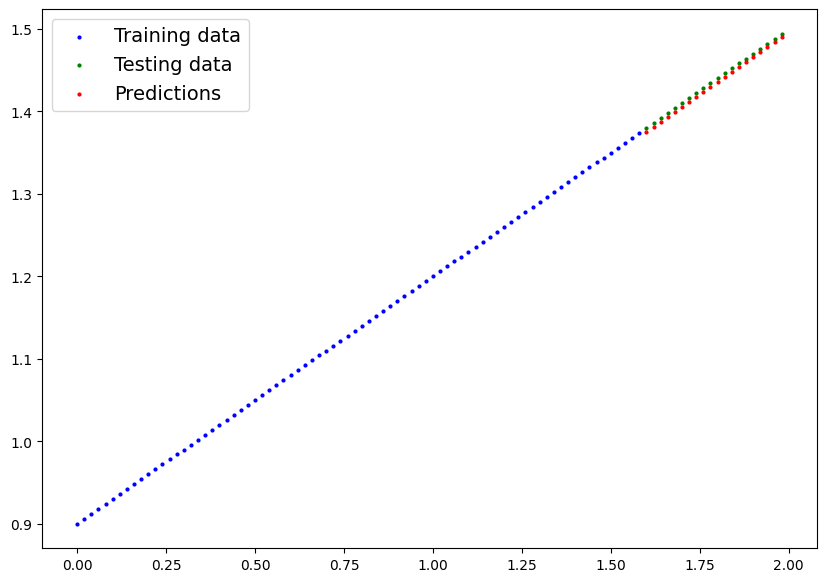

In [34]:
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), predictions=y_preds.cpu())

### Saving the Model

In [38]:
from pathlib import Path

# Creating the directory
MODELS = Path('models')
MODELS.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_PATH = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODELS / MODEL_PATH

# Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


### Loading the Model

In [40]:
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0
